# **Problem Definition and steps taken**

We want to create a product categorization model using computer vision techniques for **Slash EG** so after collecting the data we will go through the whole process till we get the results

* [Step 1 : Importing libraires](#1)
* [Step 2 : Reading data and resizing images](#2)
* [Step 3 : Model Building and evaluation](#3)
* [Step 4 : Testing & Conclusion](#4)

<a name='1'></a>
# **Importing the needed libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import cv2
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as tfl
import pandas as pd
from tensorflow.keras.models import Model
import os
import shutil
import json
from PIL import Image
from google.colab import drive
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2


<a name='2'></a>
# **Reading Data and Preparing it**

So after collecting the data i moved it to google drive we do have 2 folders one for the train data and the other is for test data

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Done connected to my Drive let's get the data to start working !

In [3]:
#Define paths to the uploaded folders
Accesories_Train_Dir= "/content/drive/MyDrive/Train/Accessories"
Accesories_Test_Dir="/content/drive/MyDrive/Test/Accessories"
Fashion_Train_Dir= "/content/drive/MyDrive/Train/Fashion"
Fashion_Test_Dir="//content/drive/MyDrive/Test/Fashion"
Stationary_Train_Dir= "/content/drive/MyDrive/Train/Stationary"
Stationary_Test_Dir="/content/drive/MyDrive/Test/Stationary"

Now after defining the paths we need a function that can read the images and the labels from the paths

In [4]:
#In this function we read the images and preprocess it resizing it and normalizing it too
def load_images(folder_path, label):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            # Normalize the image
            image = image / 255.0
            images.append(image)
            labels.append(label)
    return images, labels


Let's prepare the train data first !

In [5]:
AccessoriesImages , AccessoriesLabels =load_images(Accesories_Train_Dir,label=0) #So if the prediction is 0 it is an accessory
FashionImages , FashionLabels =load_images(Fashion_Train_Dir,label=1) #So if the prediction is 1 it is an Fashion
StationaryImages , StationaryLabels =load_images(Stationary_Train_Dir,label=2) #So if the prediction is 2 it is clearly stationary

#Defining the Train Data
X = np.array(AccessoriesImages + FashionImages + StationaryImages)
y = np.array(AccessoriesLabels + FashionLabels + StationaryLabels)

Now for the test data let's do the same

In [6]:
AccessoriesImagesTest , AccessoriesLabelsTest =load_images(Accesories_Test_Dir,label=0) #So if the prediction is 0 it is an accessory
FashionImagesTest , FashionLabelsTest =load_images(Fashion_Test_Dir,label=1) #So if the prediction is 1 it is an Fashion
StationaryImagesTest , StationaryLabelsTest =load_images(Stationary_Test_Dir,label=2) #So if the prediction is 2 it is clearly stationary

#Defining the Train Data
X_test = np.array(AccessoriesImagesTest + FashionImagesTest + StationaryImagesTest)
y_test= np.array(AccessoriesLabelsTest + FashionLabelsTest + StationaryLabelsTest)

Checking the shape of the data

In [7]:
#Train
X.shape

(595, 224, 224, 3)

595 different images nearly 200 for each class

In [8]:
#Test
X_test.shape

(45, 224, 224, 3)

As we have 15 image for each class taken from the app

Let us check some samples

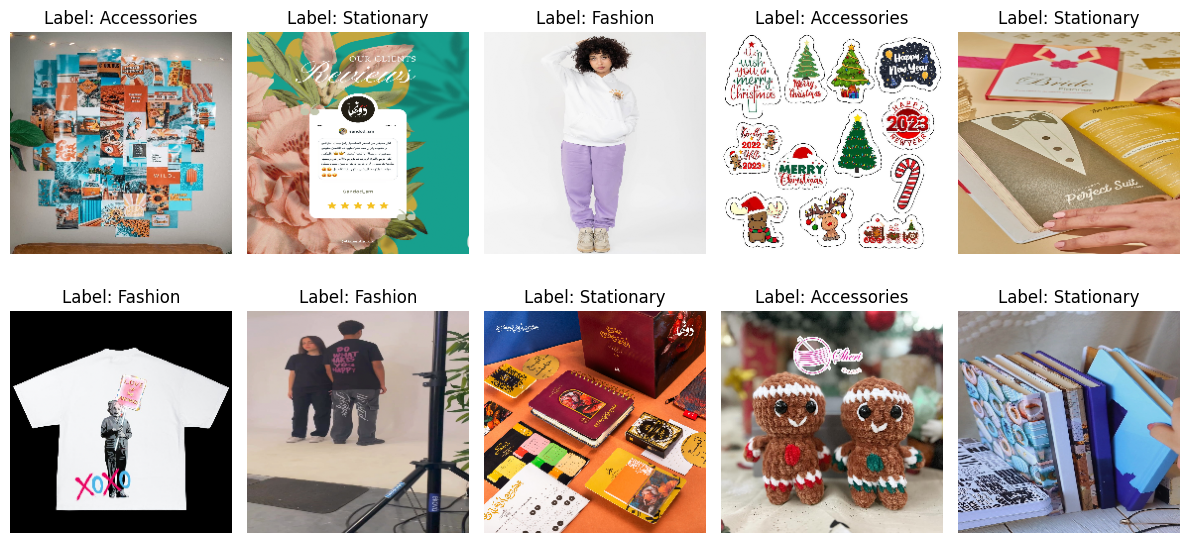

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(5):
    for j in range(2):
        random_index = random.randint(0, 595)
        image = X[random_index]
        label = y[random_index]

        class_names = ['Accessories', 'Fashion', 'Stationary']

        axs[j, i].imshow(image)
        axs[j, i].set_title(f"Label: {class_names[label]}")
        axs[j, i].axis('off')

plt.tight_layout()
plt.show()


Lets see some samples from our test data

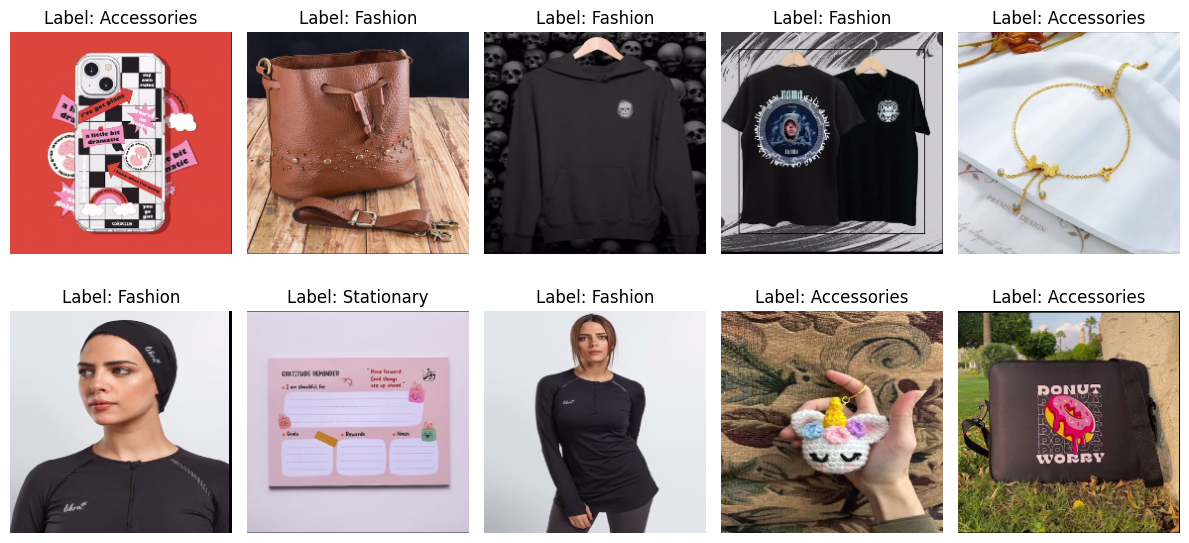

In [64]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(5):
    for j in range(2):
        random_index = random.randint(0, 45)
        image = X_test[random_index]
        label = y_test[random_index]

        class_names = ['Accessories', 'Fashion', 'Stationary']

        axs[j, i].imshow(image)
        axs[j, i].set_title(f"Label: {class_names[label]}")
        axs[j, i].axis('off')

plt.tight_layout()
plt.show()


<a name='3'></a>
# **Model Building , Training and Validation**

##**First Try : Normal CNN**

In [20]:
#Building A CNN architecture
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
input_shape = X_train[0].shape

# Convert labels to one-hot encoded format as we will use categorical cross entropy
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)



In [21]:
def classifier():
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(3, activation='softmax')
      ])
  # Compile the model
  model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [22]:
model = classifier()
# Train the model
hist=model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_val, y_val_one_hot))

Epoch 1/20
15/15 [==============================] - 4s 91ms/step - loss: 1.4102 - accuracy: 0.3571 - val_loss: 1.1021 - val_accuracy: 0.3445
Epoch 2/20
15/15 [==============================] - 1s 63ms/step - loss: 1.0417 - accuracy: 0.5231 - val_loss: 0.9737 - val_accuracy: 0.5042
Epoch 3/20
15/15 [==============================] - 1s 63ms/step - loss: 0.8992 - accuracy: 0.6008 - val_loss: 0.8361 - val_accuracy: 0.6050
Epoch 4/20
15/15 [==============================] - 1s 59ms/step - loss: 0.6427 - accuracy: 0.7458 - val_loss: 0.6898 - val_accuracy: 0.6807
Epoch 5/20
15/15 [==============================] - 1s 63ms/step - loss: 0.4488 - accuracy: 0.8361 - val_loss: 0.7495 - val_accuracy: 0.7227
Epoch 6/20
15/15 [==============================] - 1s 66ms/step - loss: 0.3164 - accuracy: 0.8887 - val_loss: 0.9731 - val_accuracy: 0.7143
Epoch 7/20
15/15 [==============================] - 1s 72ms/step - loss: 0.2267 - accuracy: 0.9244 - val_loss: 0.8923 - val_accuracy: 0.6891
Epoch 8/20
15

In [23]:
# function to plot accuracy and loss

def plot_acc_loss(acc, val_acc, loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

In [24]:
model_history = hist.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = hist.epoch

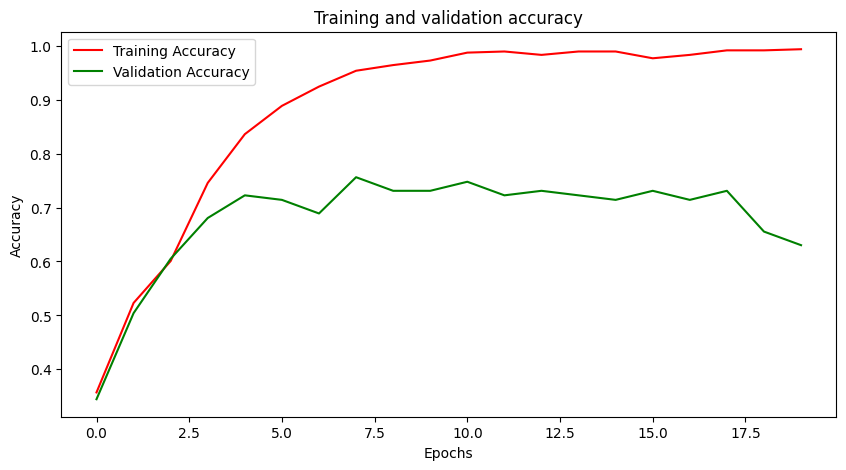

<Figure size 640x480 with 0 Axes>

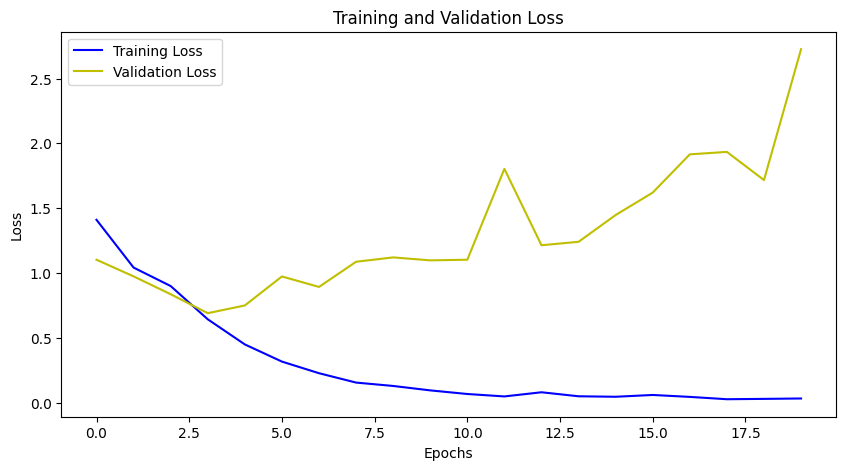

In [25]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

We could definetly do better, this model is clearly overfitting


## **Secondly Finetuning pretrained models**

### **1 ) InceptionResNet**

Loading the weights

In [27]:
pretrained_base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top as we are fine tuning
    input_shape=X_train[0].shape

)

Here we are avoiding retraining of bottom layers as this is why we are using pre trained model

In [28]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

In [29]:
pretrained_base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_212 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_203 (B  (None, 111, 111, 32)         96        ['conv2d_212[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_203 (Activation  (None, 111, 111, 32)         0         ['batch_norm

We will define the input to the model with the shape of our data and

In [35]:
# Define the input shape
inputs = tf.keras.Input(shape=X_train[0].shape)

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add drop out layer to avoid overfitting
x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 3 classes now which are our classes
output = tf.keras.layers.Dense(3, activation='softmax')(x)

# Build a model
model_2 = tf.keras.Model(inputs, output)

In [36]:
model_2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics='accuracy'

)

In [37]:
history_2 = model_2.fit(X_train, y_train_one_hot, epochs=25, validation_data=(X_val, y_val_one_hot))

Epoch 1/25
15/15 [==============================] - 19s 487ms/step - loss: 1.2367 - accuracy: 0.5021 - val_loss: 0.5517 - val_accuracy: 0.8067
Epoch 2/25
15/15 [==============================] - 3s 221ms/step - loss: 0.6149 - accuracy: 0.7311 - val_loss: 0.4246 - val_accuracy: 0.7983
Epoch 3/25
15/15 [==============================] - 3s 218ms/step - loss: 0.4304 - accuracy: 0.8319 - val_loss: 0.3854 - val_accuracy: 0.8739
Epoch 4/25
15/15 [==============================] - 3s 215ms/step - loss: 0.3288 - accuracy: 0.8697 - val_loss: 0.3500 - val_accuracy: 0.8571
Epoch 5/25
15/15 [==============================] - 3s 216ms/step - loss: 0.2897 - accuracy: 0.9013 - val_loss: 0.3684 - val_accuracy: 0.8739
Epoch 6/25
15/15 [==============================] - 4s 271ms/step - loss: 0.3024 - accuracy: 0.8866 - val_loss: 0.3289 - val_accuracy: 0.9076
Epoch 7/25
15/15 [==============================] - 3s 218ms/step - loss: 0.2472 - accuracy: 0.9013 - val_loss: 0.3275 - val_accuracy: 0.8908
Epoch

In [39]:
model_history = history_2.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history_2.epoch

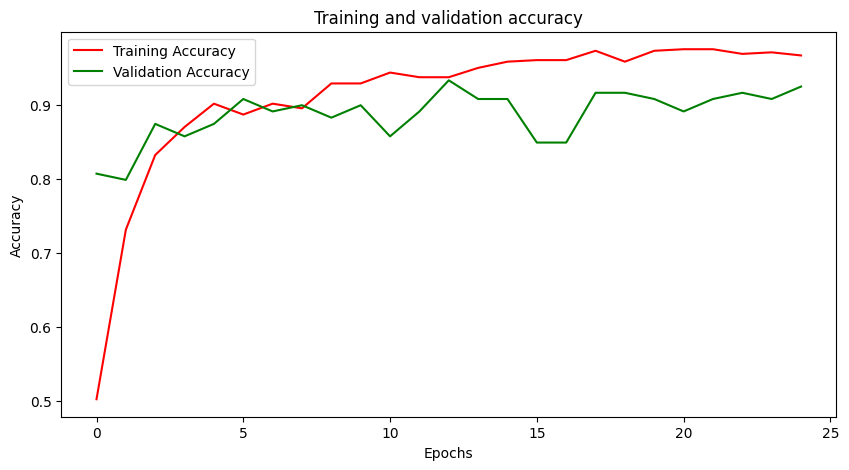

<Figure size 640x480 with 0 Axes>

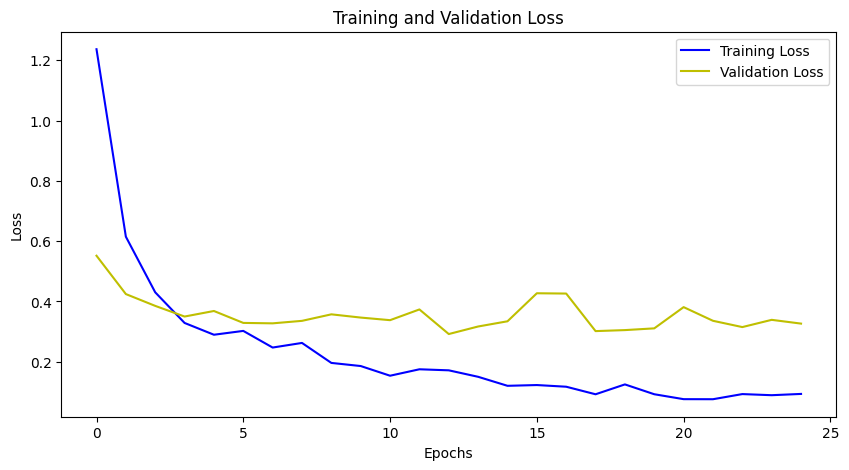

In [40]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

Much better !!

### **2) MobileNet**

In [41]:
# Load the MobileNetV2 model with pre-trained weights
pretrained_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=X_train[0].shape)

# Freeze the layers of the pretrained model
for layer in pretrained_base_model.layers:
    layer.trainable = False

# Define the input shape
inputs = tf.keras.Input(shape=X_train[0].shape)

# Stack the inputs to the pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a dropout layer to avoid overfitting
x = tf.keras.layers.Dropout(0.4)(x)

# Output dense layer with 3 classes
output = tf.keras.layers.Dense(3, activation='softmax')(x)

# Build the model
model_3 = tf.keras.Model(inputs, output)

# Compile the model
model_3.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_3 = model_3.fit(X_train, y_train_one_hot, epochs=25, validation_data=(X_val, y_val_one_hot))


9406464/9406464 [==============================] - 2s 0us/step
Epoch 1/25
15/15 [==============================] - 8s 305ms/step - loss: 0.9332 - accuracy: 0.5945 - val_loss: 0.5708 - val_accuracy: 0.7731
Epoch 2/25
15/15 [==============================] - 1s 57ms/step - loss: 0.5769 - accuracy: 0.7836 - val_loss: 0.4571 - val_accuracy: 0.8571
Epoch 3/25
15/15 [==============================] - 1s 68ms/step - loss: 0.4118 - accuracy: 0.8424 - val_loss: 0.4446 - val_accuracy: 0.8571
Epoch 4/25
15/15 [==============================] - 1s 68ms/step - loss: 0.3419 - accuracy: 0.8992 - val_loss: 0.4078 - val_accuracy: 0.8487
Epoch 5/25
15/15 [==============================] - 1s 68ms/step - loss: 0.2543 - accuracy: 0.8950 - val_loss: 0.4268 - val_accuracy: 0.8487
Epoch 6/25
15/15 [==============================] - 1s 59ms/step - loss: 0.2371 - accuracy: 0.8992 - val_loss: 0.4018 - val_accuracy: 0.8571
Epoch 7/25
15/15 [==============================] - 1s 67ms/step - loss: 0.2157 - accuracy

In [45]:
model_history = history_3.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history_3.epoch

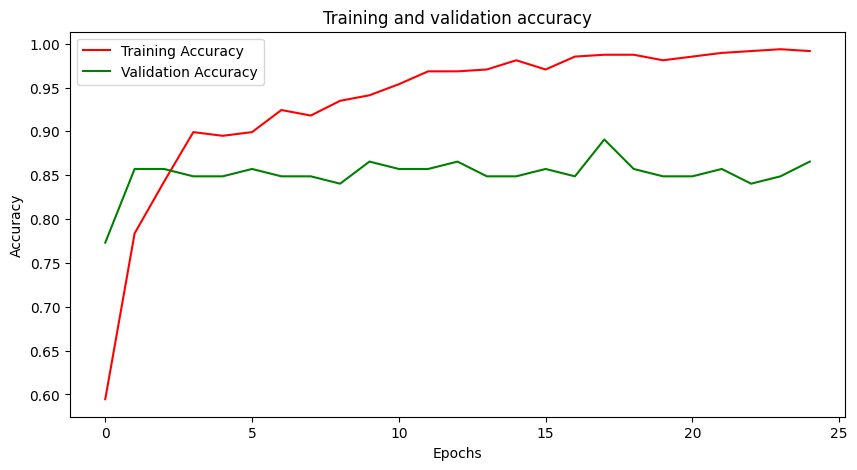

<Figure size 640x480 with 0 Axes>

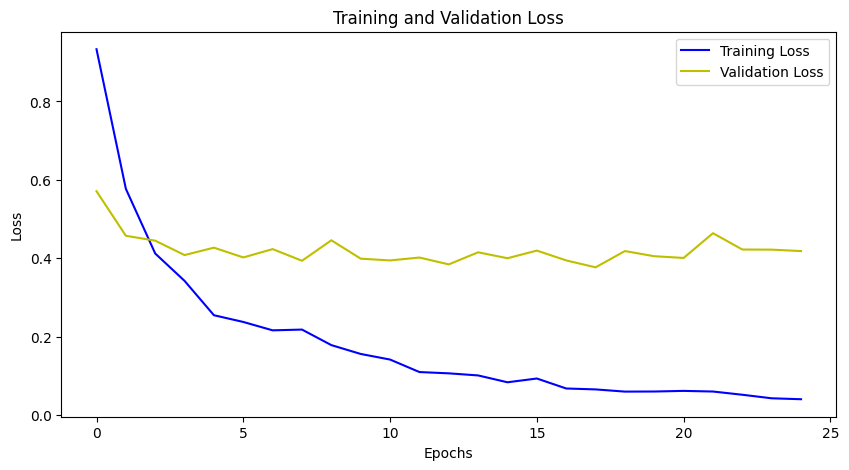

In [46]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

The results we got from InceptionResNet is better

### **3) DenseNet**

In [44]:
from tensorflow.keras.applications import DenseNet121

# Load the DenseNet121 model with pre-trained weights
pretrained_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=X_train[0].shape)

# Freeze the layers of the pretrained model
for layer in pretrained_base_model.layers:
    layer.trainable = False

# Define the input shape
inputs = tf.keras.Input(shape=X_train[0].shape)

# Stack the inputs to the pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a dropout layer to avoid overfitting
x = tf.keras.layers.Dropout(0.4)(x)

# Output dense layer with 3 classes
output = tf.keras.layers.Dense(3, activation='softmax')(x)

# Build the model
model_4 = tf.keras.Model(inputs, output)

# Compile the model
model_4.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_4 = model_4.fit(X_train, y_train_one_hot, epochs=25, validation_data=(X_val, y_val_one_hot))


29084464/29084464 [==============================] - 2s 0us/step
Epoch 1/25
15/15 [==============================] - 24s 979ms/step - loss: 1.1211 - accuracy: 0.5084 - val_loss: 0.6396 - val_accuracy: 0.6891
Epoch 2/25
15/15 [==============================] - 2s 142ms/step - loss: 0.7026 - accuracy: 0.7101 - val_loss: 0.4979 - val_accuracy: 0.7983
Epoch 3/25
15/15 [==============================] - 2s 142ms/step - loss: 0.5783 - accuracy: 0.7563 - val_loss: 0.4773 - val_accuracy: 0.7983
Epoch 4/25
15/15 [==============================] - 2s 122ms/step - loss: 0.4819 - accuracy: 0.7920 - val_loss: 0.4189 - val_accuracy: 0.8487
Epoch 5/25
15/15 [==============================] - 2s 143ms/step - loss: 0.4158 - accuracy: 0.8487 - val_loss: 0.3645 - val_accuracy: 0.8739
Epoch 6/25
15/15 [==============================] - 2s 144ms/step - loss: 0.3785 - accuracy: 0.8634 - val_loss: 0.3881 - val_accuracy: 0.8655
Epoch 7/25
15/15 [==============================] - 2s 132ms/step - loss: 0.3341 -

In [47]:
model_history = history_4.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history_4.epoch

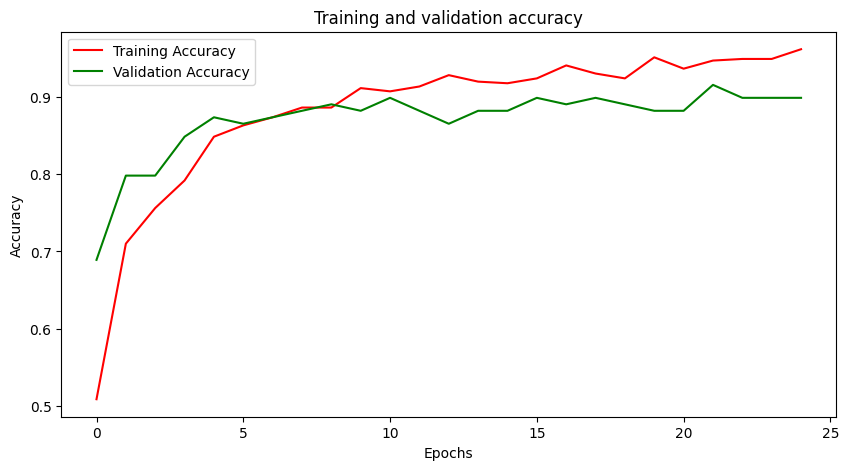

<Figure size 640x480 with 0 Axes>

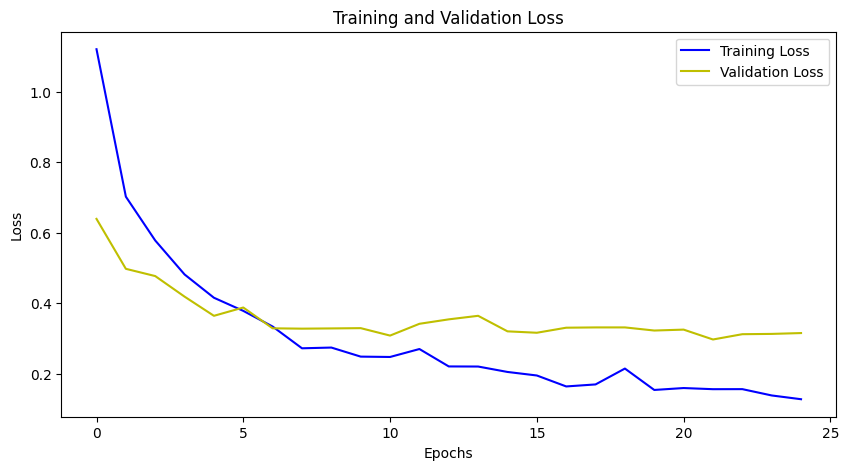

In [48]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

DenseNet Was better than MobileNet yet InceptionResNet won

<a name='4'></a>
# **Evaluation on test & Conclusion**

## **Evaluation on test data from Slash app**

**Results of Built CNN**

In [52]:
from sklearn.metrics import accuracy_score

# Predict the classes for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 16ms/step
Test Accuracy: 0.4888888888888889


Nearly 50 %

**Results on InceptionResNet**

In [54]:
from sklearn.metrics import accuracy_score

# Predict the classes for the test set
y_pred_prob = model_2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 7s 2s/step
Test Accuracy: 0.8


**80 %**

**Results on MobileNet**

In [55]:
from sklearn.metrics import accuracy_score

# Predict the classes for the test set
y_pred_prob = model_3.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 5s 2s/step
Test Accuracy: 0.7777777777777778


77 %

**Finally DenseNet**

In [56]:
from sklearn.metrics import accuracy_score

# Predict the classes for the test set
y_pred_prob = model_4.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 6s 3s/step
Test Accuracy: 0.9333333333333333


**93 % Accurate !**

Which means only 3 samples out of our 45 samples failed and after looking deeper the failed images was the ones with the models holding laptop sleeves as this can even confuse us humans if it is the clothes or the sleeve they are selling.

##**Conclusion**

The model with the best results or accuracies for train and validation data was **InceptionResNet** & after it came DenseNet which even scored better on the test data so maybe if we do have even more testing data we could decide which to finally use but seeing the progress of DenseNet along the epochs was promising and sometimes better than InceptionResNet too so the final best choice is ...

The model built by fine tuning ***DenseNet***

Lets see some results.

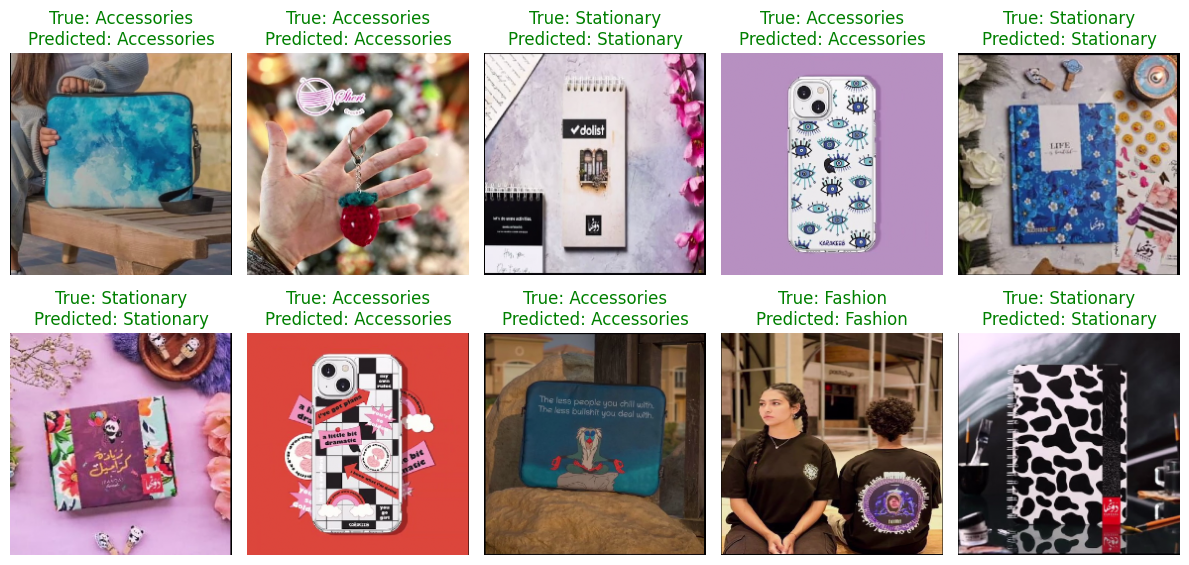

In [60]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i in range(5):
    for j in range(2):
        random_index = random.randint(0, len(X_test)-1)
        image = X_test[random_index]
        true_label = y_test[random_index]
        predicted_label = y_pred[random_index]

        class_names = ['Accessories', 'Fashion', 'Stationary']

        axs[j, i].imshow(image)

        # Set title with green color if true and predicted labels match, otherwise set with red color
        if true_label == predicted_label:
            axs[j, i].set_title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color='green')
        else:
            axs[j, i].set_title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color='red')

        axs[j, i].axis('off')

plt.tight_layout()
plt.show()


Thank You for the chance to work on this great task :)

**Youssef Salem**